In [1]:
!pip install pyod

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Potential Solution 1: Detecting Outiliers with IForest using contamination 

In [3]:
df = pd.DataFrame({
    "var1" : [0.85, 1.25, 1.60, 1.25, 1.10, 0.75, 1.5, 3.30, 3.0],
    "var2" : [3.15, 3.5, 3.15, 2.95, 3.0, 2.8, 2.6, 3.0, 1.0],
    "cat1" : "A B C D E F G H I".split(' '),
})

In [4]:
sns.set_style('darkgrid')
#sns.set(rc={'figure.figsize':(15.7,7.27)})

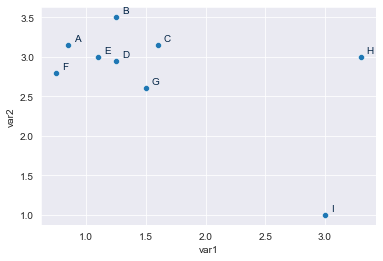

In [5]:
sns.scatterplot(data=df, x='var1', y='var2')
for i in range(df.shape[0]):
    plt.text(x=df.var1.tolist()[i]+0.05,y=df.var2.tolist()[i]+0.05, 
             s=df.cat1.tolist()[i], 
          fontdict=dict(color='#002244',size=10))
plt.show()

In [6]:
# Import IForest from pyod
from pyod.models.iforest import IForest

# Initialize an instance
#set the contamination argurment.  What is contamination?
# it is a threshold level that must be between 0 and 0.5
# The higher, the more records it will classify as "outlier" 
# though also with high contamination value the more likely are
# false positives

iforest = IForest(contamination=0.15)

# Generate outlier labels and remove the non numerical features
labels = iforest.fit_predict(df[['var1', 'var2']])

# Filter big_mart for outliers
outliers = df[labels==1]

C:\Users\henry\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


With a contamination of 0.15 the model identified "H" and "I" as outliers

In [7]:
display((outliers.shape))
display((outliers))
display(labels)
display(iforest.labels_)

(2, 3)

,var1,var2,cat1
7,3.3,3.0,H
8,3.0,1.0,I


array([0, 0, 0, 0, 0, 0, 0, 1, 1])

array([0, 0, 0, 0, 0, 0, 0, 1, 1])

In [8]:
#predict new data
new_data = [[2.8, 1.5], [1.0, 3.0]]
display(iforest.predict(new_data))

array([1, 0])

In [9]:
#find the confidence
#first column is probability of record being an inlier while the second is probablity of it being an outlier
all_probs = iforest.predict_proba(df[['var1', 'var2']])
display(all_probs)

array([[0.81193374, 0.18806626],
       [0.64237319, 0.35762681],
       [0.84844815, 0.15155185],
       [1.        , 0.        ],
       [0.97892757, 0.02107243],
       [0.64771553, 0.35228447],
       [0.69364332, 0.30635668],
       [0.4474507 , 0.5525493 ],
       [0.        , 1.        ]])

# Potential Solution 2: Detecting Outiliers with IForest using the N_estimators, max_samples, and max_features

In [10]:
#going to use the boston housing data set

In [11]:
from sklearn import datasets

In [12]:
boston = datasets.load_boston()

X = boston.data
print(); print(X.shape);
y = boston.target
print(); print(y.shape);

df1 = pd.DataFrame(X)
df1.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
               'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
dftarget = pd.DataFrame(y, columns =['Target'])
df1 = pd.concat([df1, dftarget], axis=1)


(506, 13)

(506,)


In [13]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


When we want to specify the exact number of iTrees in IForest, use the n_estimators parameter.  It defaults to 100, though as the dataset gets larger set it larger.<br>Each Tree trains on a sub sample of the dataset and a sub sample of features, set by max_samples and max_features. Both accept values between 0 and 1. Frequent subsampling reduces the risk of overfitting.

In [14]:
# Import IForest from pyod
from pyod.models.iforest import IForest

# Initialize an instance
iforest = IForest(n_estimators=200, max_samples=0.6, max_features=0.9)

# Generate outlier labels and remove the non numerical features
labels = iforest.fit_predict(df1)

# Filter big_mart for outliers
outliers = df1[labels==1]

C:\Users\henry\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [15]:
display((outliers.shape))
display((outliers.head()))

(51, 14)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82,13.4
143,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42,15.6
144,2.77974,0.0,19.58,0.0,0.871,4.903,97.8,1.3459,5.0,403.0,14.7,396.90,29.29,11.8
145,2.37934,0.0,19.58,0.0,0.871,6.130,100.0,1.4191,5.0,403.0,14.7,172.91,27.80,13.8
146,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65,15.6


# LOCAL OUTLIER FACTOR (LOF)

In [16]:
# Import LOF from its relevant module
from pyod.models.lof import LOF

# Instantiate LOF and fit to df less cat1
lof = LOF(contamination = 0.25, n_neighbors = 5, n_jobs=-1)
lof.fit(df[['var1', 'var2']])

# Create a boolean index that checks for outliers
is_outlier = lof.labels_ == 1

# Isolate the outliers
outliers = df[['var1', 'var2']][is_outlier]

In [17]:
display(is_outlier)
display(outliers)

df.loc[is_outlier]

array([False, False, False, False, False, False, False,  True,  True])

,var1,var2
7,3.3,3.0
8,3.0,1.0


,var1,var2,cat1
7,3.3,3.0,H
8,3.0,1.0,I


In [18]:
# Calculate probabilities
probs = lof.predict_proba(df[['var1', 'var2']])
print('what were the probabilities:')
display(probs)

# Create a boolean mask
is_outlier_with_prob_threshold = probs[:, 1] > 0.5
display(is_outlier_with_prob_threshold)
# Use the boolean mask to filter the outliers
#outliers = df[['var1', 'var2']][is_outlier]
print('is it an outlier defined by having a prob > 0.5')
display(df.loc[is_outlier_with_prob_threshold])


what were the probabilities:


array([[0.98627779, 0.01372221],
       [0.99788182, 0.00211818],
       [0.98850549, 0.01149451],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.99092099, 0.00907901],
       [0.98454708, 0.01545292],
       [0.41145346, 0.58854654],
       [0.22965136, 0.77034864]])

array([False, False, False, False, False, False, False,  True,  True])

is it an outlier defined by having a prob > 0.5


,var1,var2,cat1
7,3.3,3.0,H
8,3.0,1.0,I


# An Idea of how you might hypertune a model

In [19]:
# Instantiate LOF and fit to df less cat1
from itertools import product


# Create a boolean index that checks for outliers
is_outlier = lof.labels_ == 1

# Isolate the outliers
outliers = df[['var1', 'var2']][is_outlier]




contamination = [0.10, 0.15, 0.30]
n_neighbors = [3, 5, 8, 12]
scores = dict()

for con, n_neig in product(contamination, n_neighbors):
    lof = LOF(contamination = con, n_neighbors = n_neig, n_jobs=-1)
    lof.fit(df[['var1', 'var2']])
    # Create a boolean index that checks for outliers
    is_outlier = lof.labels_ == 1
    print('contamination: ', con, 'n_neighbors: ', n_neig, ':', is_outlier)
    

contamination:  0.1 n_neighbors:  3 : [False False False False False False False False  True]
contamination:  0.1 n_neighbors:  5 : [False False False False False False False False  True]
contamination:  0.1 n_neighbors:  8 : [False False False False False False  True False False]
contamination:  0.1 n_neighbors:  12 : [False False False False False False  True False False]
contamination:  0.15 n_neighbors:  3 : [False False False False False False False  True  True]
contamination:  0.15 n_neighbors:  5 : [False False False False False False False  True  True]
contamination:  0.15 n_neighbors:  8 : [False False False False False False  True  True False]
contamination:  0.15 n_neighbors:  12 : [False False False False False False  True  True False]
contamination:  0.3 n_neighbors:  3 : [False  True False False False False False  True  True]
contamination:  0.3 n_neighbors:  5 : [False False False False  True False False  True  True]
contamination:  0.3 n_neighbors:  8 : [False False  Tr

C:\Users\henry\anaconda3\lib\site-packages\sklearn\neighbors\_lof.py:274: UserWarning: n_neighbors (12) is greater than the total number of samples (9). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn("n_neighbors (%s) is greater than the "
C:\Users\henry\anaconda3\lib\site-packages\sklearn\neighbors\_lof.py:274: UserWarning: n_neighbors (12) is greater than the total number of samples (9). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn("n_neighbors (%s) is greater than the "
C:\Users\henry\anaconda3\lib\site-packages\sklearn\neighbors\_lof.py:274: UserWarning: n_neighbors (12) is greater than the total number of samples (9). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn("n_neighbors (%s) is greater than the "


above, notice the variation in what get labeled an outlier depending on the values set for contamination and n_neighbors